<a href="https://colab.research.google.com/github/midleone/DI-Bootcamp/blob/main/week6/day5/mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install matplotlib mplfinance pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.9 MB/s eta 0:00:00


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro


file_path = 'AAPL, 1D 01012007-12072023.csv'
df = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(df.head())

print("\nInfo about the dataset:")
print(df.info())


First few rows of the dataset:
         volume    vwap    open   close    high     low        time  \
0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250  1167800400   
1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936  1167886800   
2  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143  1167973200   
3  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457  1168232400   
4  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411  1168318800   

   transactions  
0        189737  
1        136333  
2        141050  
3        130547  
4        569578  

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5

In [18]:
df['time'] = pd.to_datetime(df['time'])

df.set_index('time', inplace=True)

print("\nUpdated dataset with 'time' as the index:")
print(df.head())

print("\nTime series properties:")
print("Frequency:")
print(df.index.freq)
print("\nTrends:")


Updated dataset with 'time' as the index:
                                     volume    vwap    open   close    high  \
time                                                                          
1970-01-01 00:00:01.167800400  1.245445e+09  3.0302  3.0821  2.9929  3.0921   
1970-01-01 00:00:01.167886800  8.554834e+08  3.0403  3.0018  3.0593  3.0696   
1970-01-01 00:00:01.167973200  8.352580e+08  3.0426  3.0632  3.0375  3.0786   
1970-01-01 00:00:01.168232400  7.974138e+08  3.0683  3.0700  3.0525  3.0904   
1970-01-01 00:00:01.168318800  3.352007e+09  3.1946  3.0875  3.3061  3.3207   

                                  low  transactions  
time                                                 
1970-01-01 00:00:01.167800400  2.9250        189737  
1970-01-01 00:00:01.167886800  2.9936        136333  
1970-01-01 00:00:01.167973200  3.0143        141050  
1970-01-01 00:00:01.168232400  3.0457        130547  
1970-01-01 00:00:01.168318800  3.0411        569578  

Time series properties:


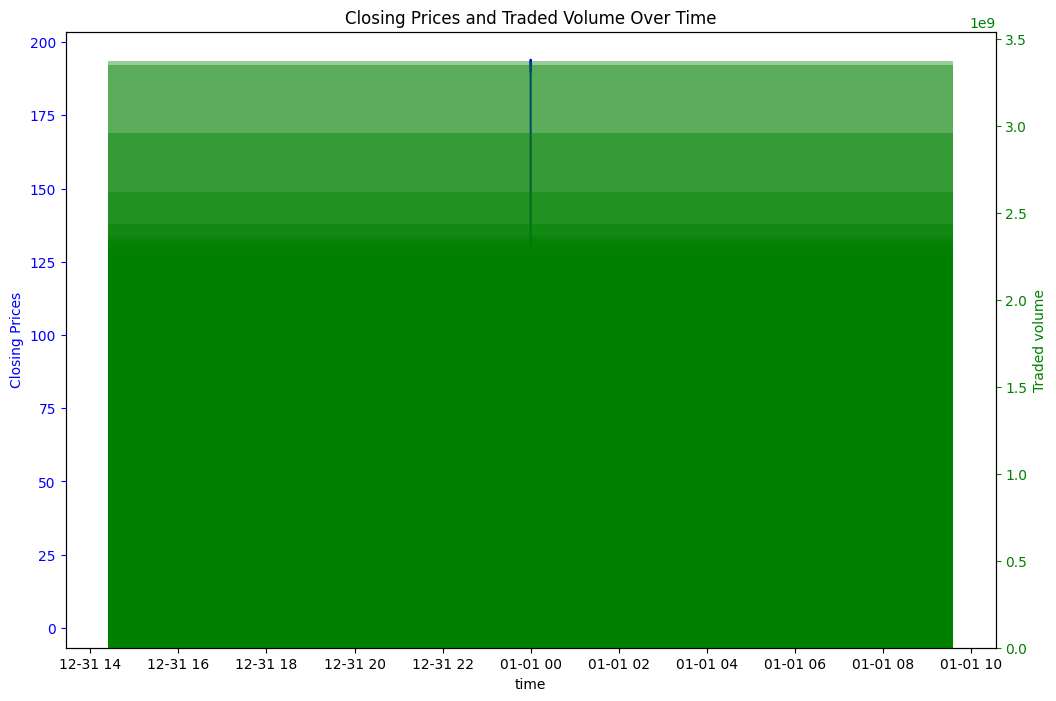

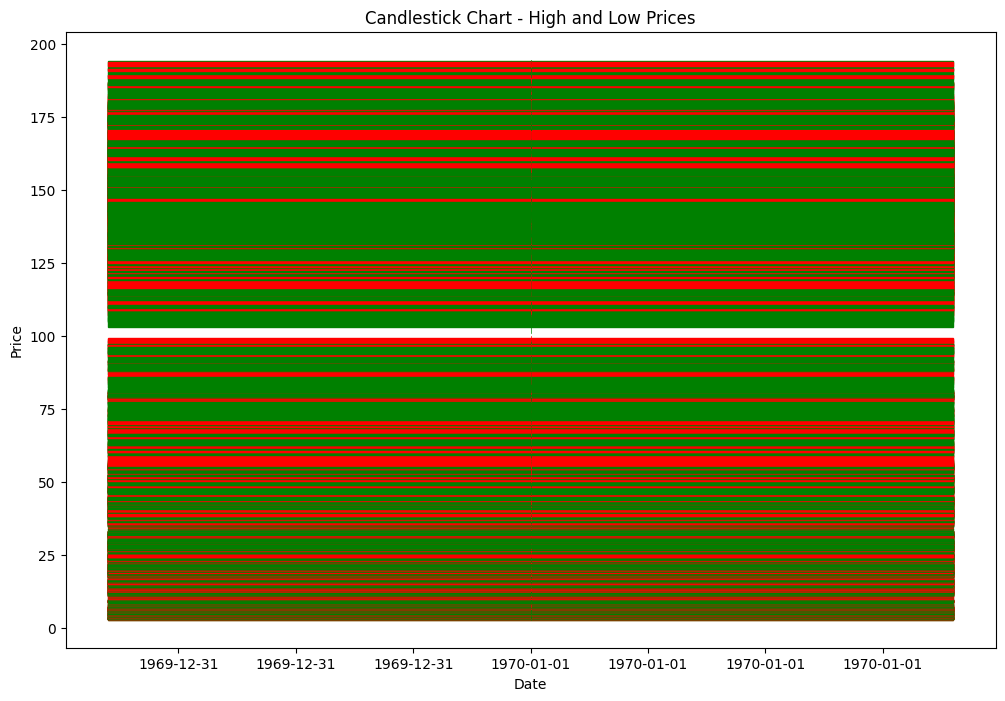

In [26]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df.index, df['close'], color='blue', label='Closing Prices')
ax1.set_xlabel('time')
ax1.set_ylabel('Closing Prices', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.bar(df.index, df['volume'], color='green', alpha=0.4, label='Traded volume')
ax2.set_ylabel('Traded volume', color='green')
ax2.tick_params('y', colors='green')

plt.title('Closing Prices and Traded Volume Over Time')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))

df['Date_MPL'] = mdates.date2num(df.index)

candlestick_ohlc(ax, df[['Date_MPL', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='green', colordown='red')

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Candlestick Chart - High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Summary Statistics:
              open         high          low        close        volume
count  4159.000000  4159.000000  4159.000000  4159.000000  4.159000e+03
mean     46.362788    46.881127    45.865790    46.396058  3.662925e+08
std      50.235593    50.843874    49.680104    50.293482  3.724793e+08
min       2.835400     2.928600     2.792900     2.792900  2.422234e+07
25%      11.955700    12.028400    11.853600    11.947150  1.067497e+08
50%      25.775000    26.262800    25.680000    25.825000  2.136463e+08
75%      52.263750    52.626250    51.796250    52.231250  4.965321e+08
max     193.780000   194.480000   191.760000   193.970000  3.373042e+09


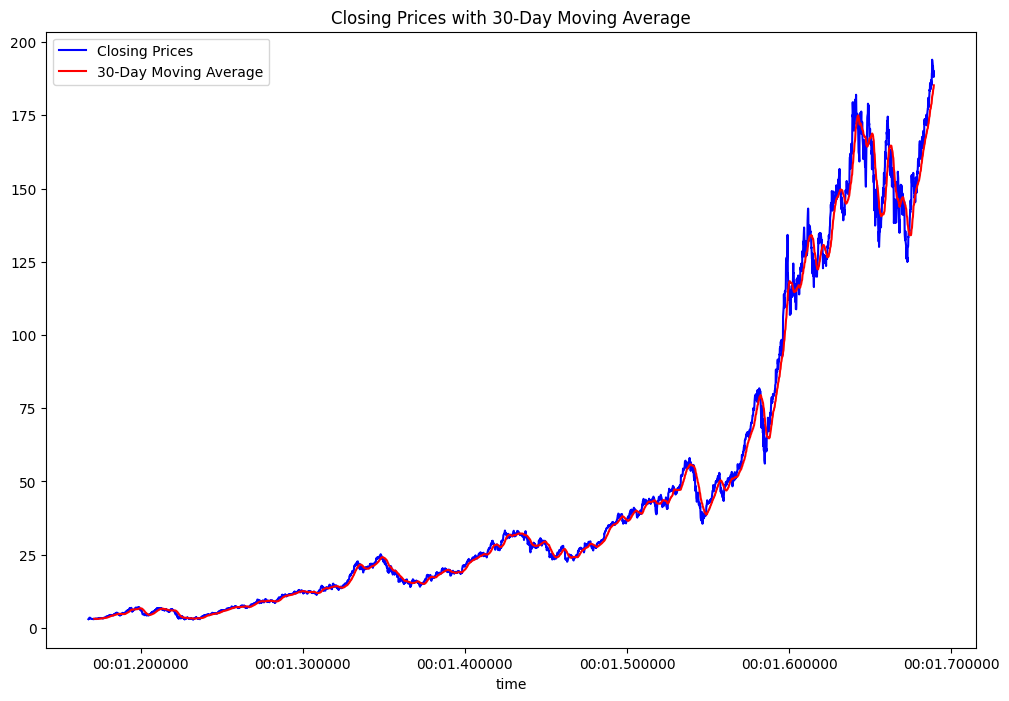

In [22]:
summary_stats = df[['open', 'high', 'low', 'close', 'volume']].describe()
print("Summary Statistics:")
print(summary_stats)

closing_prices = df['close']

moving_average = closing_prices.rolling(window=30).mean()

plt.figure(figsize=(12, 8))
plt.plot(closing_prices, label='Closing Prices', color='blue')
plt.plot(moving_average, label='30-Day Moving Average', color='red')
plt.title('Closing Prices with 30-Day Moving Average')
plt.xlabel('time')
plt.legend()
plt.show()

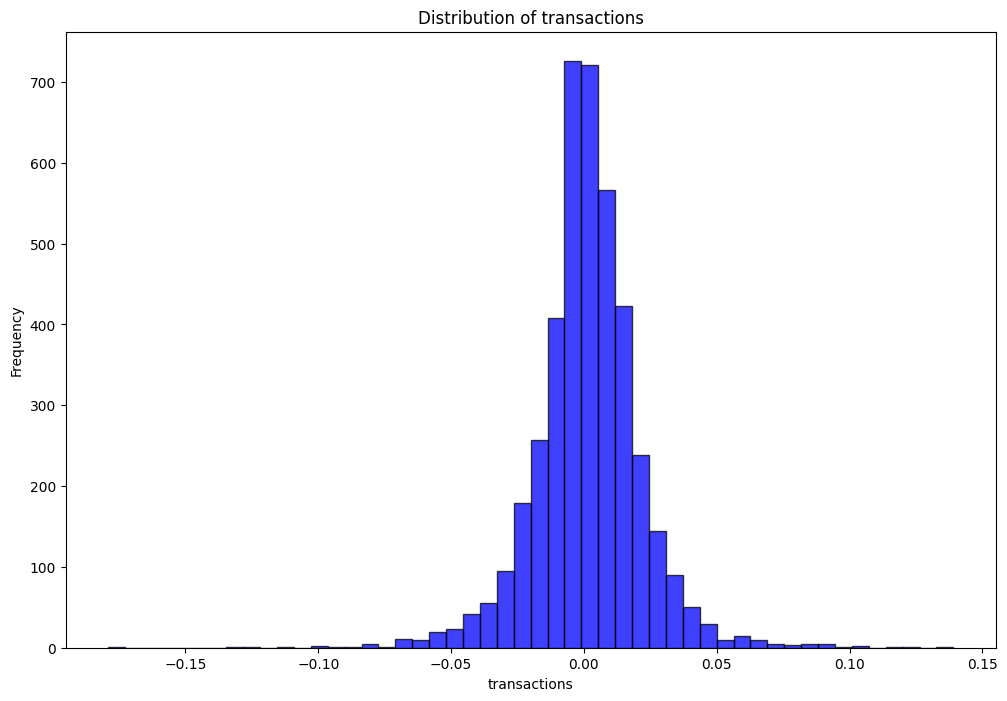


Shapiro-Wilk Test for Normality:
Statistic: 0.9406672716140747, P-Value: 6.185059009108278e-38


In [25]:


df['transactions'] = df['close'].pct_change()
df.dropna(inplace=True)

plt.figure(figsize=(12, 8))
plt.hist(df['transactions'], bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of transactions')
plt.xlabel('transactions')
plt.ylabel('Frequency')
plt.show()

statistic, p_value_shapiro = shapiro(df['transactions'])
print("\nShapiro-Wilk Test for Normality:")
print(f"Statistic: {statistic}, P-Value: {p_value_shapiro}")